# Alignment: Fitting of Transformations

Previously, we fit a model to features in an image. Now we are going to fit a model to a transformation between pairs of features in 2 images.

Find the transformation T that minimizes 

$$\sum_{i=1}^{n} residual(T(x_i),x_i^`)$$

where $x_i$ and $y_i$ are pairs of features in 2 images.

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.pyplot as plt

### Translation

In translation, we move an image by a certain amount. The transformation is given by

$$T(x) = x + t$$

where $t$ is the translation vector.

A 2x2 matrix cannot be used to represent translation. We need a 3x3 matrix. The transformation matrix is given by

$$T = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix}$$

### Homogenous Coordinates

The homogenous representation of a 2D point $p = (x,y)$ is a 3D point $p = (\tilde{x}, \tilde{y}, \tilde{z})$. Where $\tilde{z}$ is called a fictitious coordinate used to normalize the coordinates.

$$x = \frac{\tilde{x}}{\tilde{z}}$$

$$y = \frac{\tilde{y}}{\tilde{z}}$$

Consider a line drawn from the origin to such a point p. All points on this line represet the homogenous coordinate of $p(x,y)$ and all points are said to be equivalent.

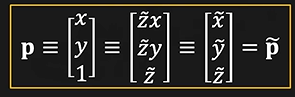

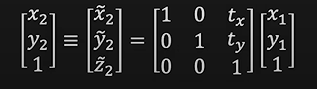

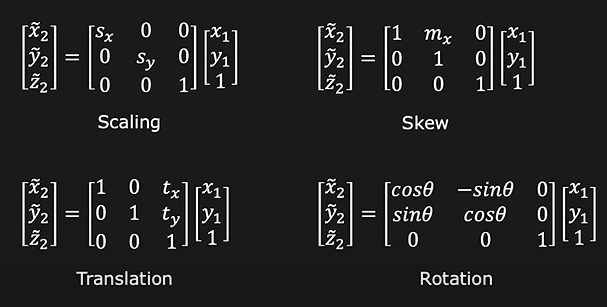

### Isometries Transformation

Isometries are transformations that preserve distances and angles, meaning the shape and size of geometric figures remain unchanged after the transformation. We only rotate and translate

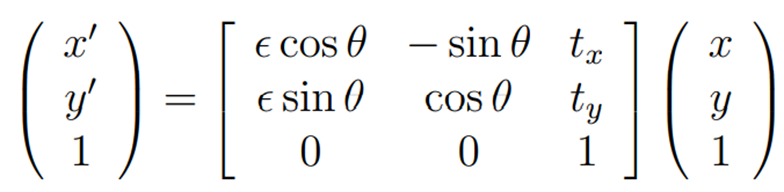

Here $\epsilon = \pm 1$ is the sense. It determines the direction of rotation. $\theta$ is the angle of rotation. $t_x$ and $t_y$ are the translation in $x$ and $y$ directions.

It can also be given by:

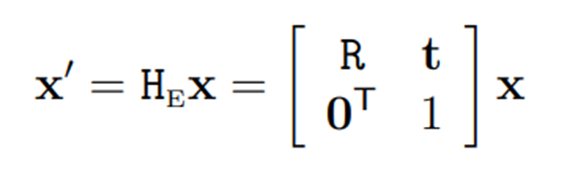

where R is the matrix of rotation and T is the matrix of translation.

### Similarity Transformation

Similarity transformations are transformations that preserve angles and ratios of distances. The shape of the geometric figure remains unchanged after the transformation. The size of the geometric figure can change. We only rotate, translate and scale

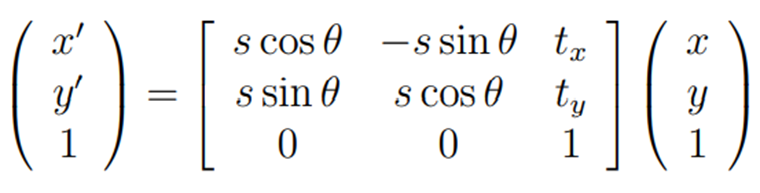

Here $s$ is the scale factor and $\theta$ is the angle of rotation. $t_x$ and $t_y$ are the translation in x and y directions.

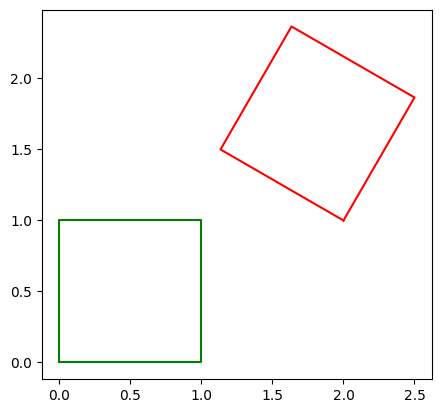

In [10]:
# Points a, b, c, d
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1] # The last element is 1 to make it homogenous so that we can use matrix multiplication

X = np.array([a, b, c, d]).T

theta = np.pi/180*60
t = np.array([2, 1]).T
H = np.array([[np.cos(theta), -np.sin(theta), t[0]], [np.sin(theta), np.cos(theta), t[1]], [0, 0, 1]]) # Similarity transformation matrix
Y = H @ X

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

### Affine Transformation

Affine transformations are transformations that preserve parallel lines and ratios of distances along parallel lines. The shape of the geometric figure remains unchanged after the transformation. The size of the geometric figure can change. Additionally, angles can change.

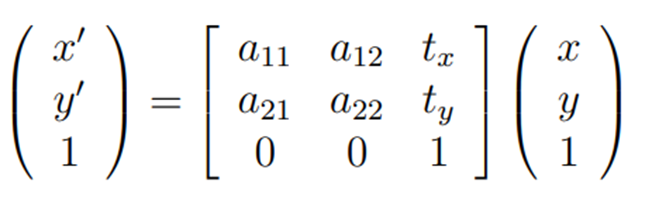


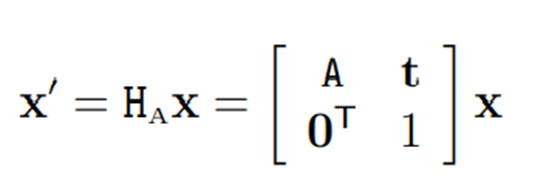

where A is 2x2 non singular matrix, and T is the matrix of translation.

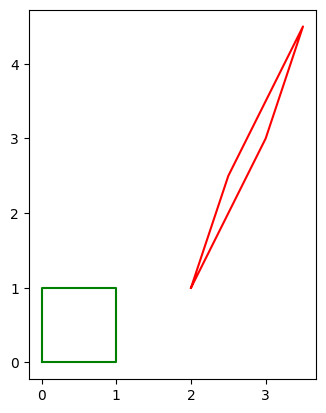

In [11]:
# Points a, b, c, d
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1] # The last element is 1 to make it homogenous so that we can use matrix multiplication

X = np.array([a, b, c, d]).T

theta = np.pi/180*60
t = np.array([2, 1]).T

A  = np.array([[1, 0.5, t[0]], [2, 1.5, t[1]], [0, 0, 1]]) # Affine transformaiton
Y = A @ X

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
plt.show()

### Projective Transformation

Projective transformations are transformations that preserve straight lines. Parallel lines can be lost. The size of the geometric figure can change. Additionally, angles can change. This is also called a homography. A homograpgy is equivalent to mapping a plane to another plane through a point.

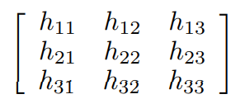

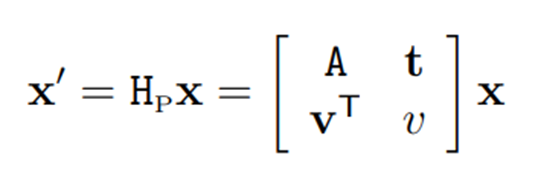

This is specified by 8 parameters.

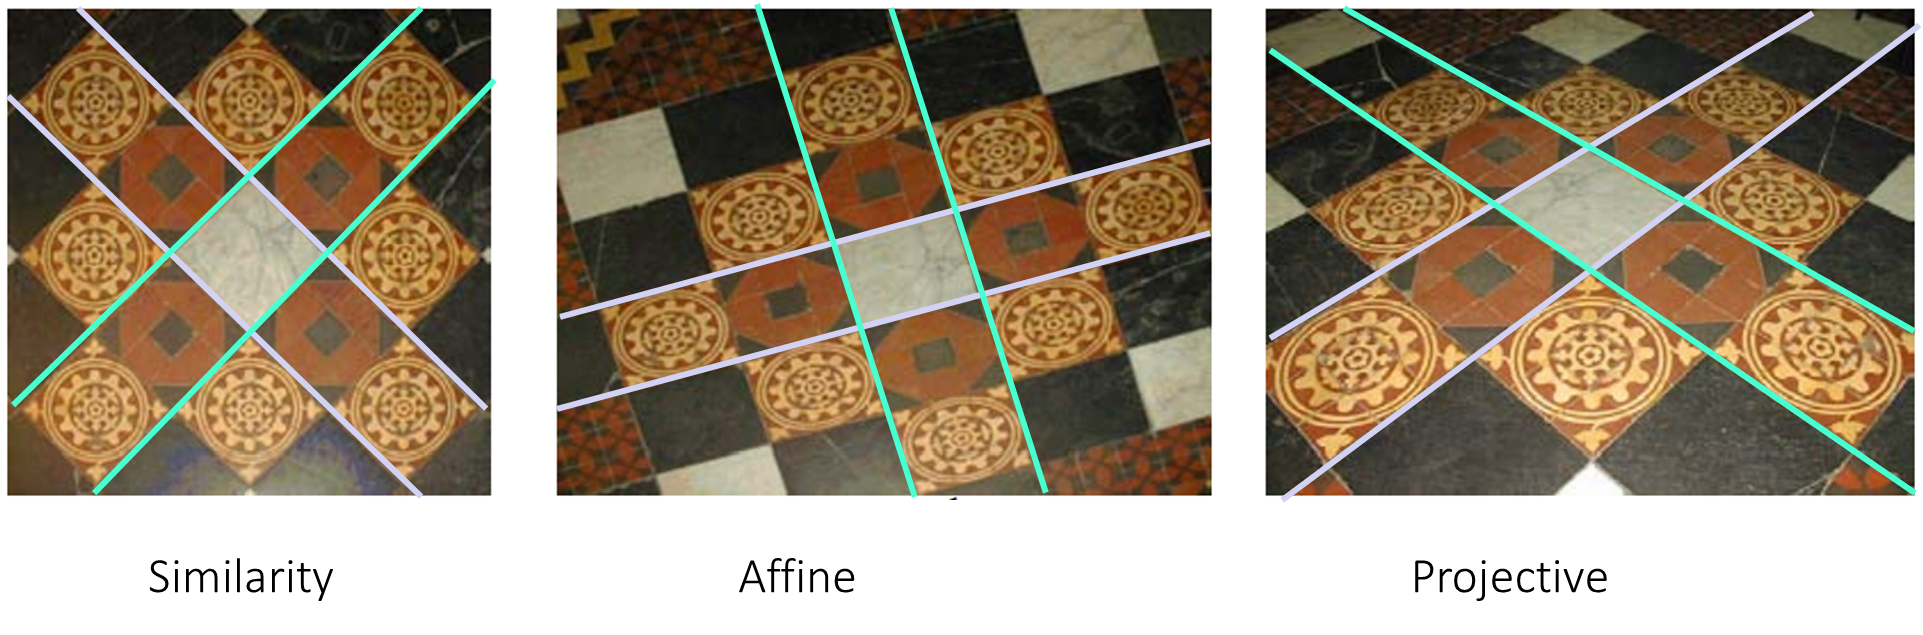

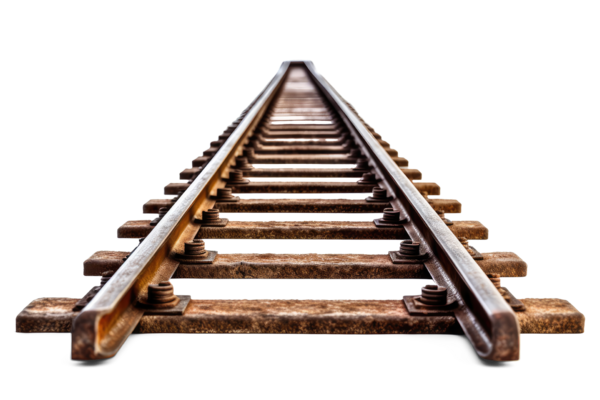

An example of projective transformation. Parallel nature of the railway tracks is lost.

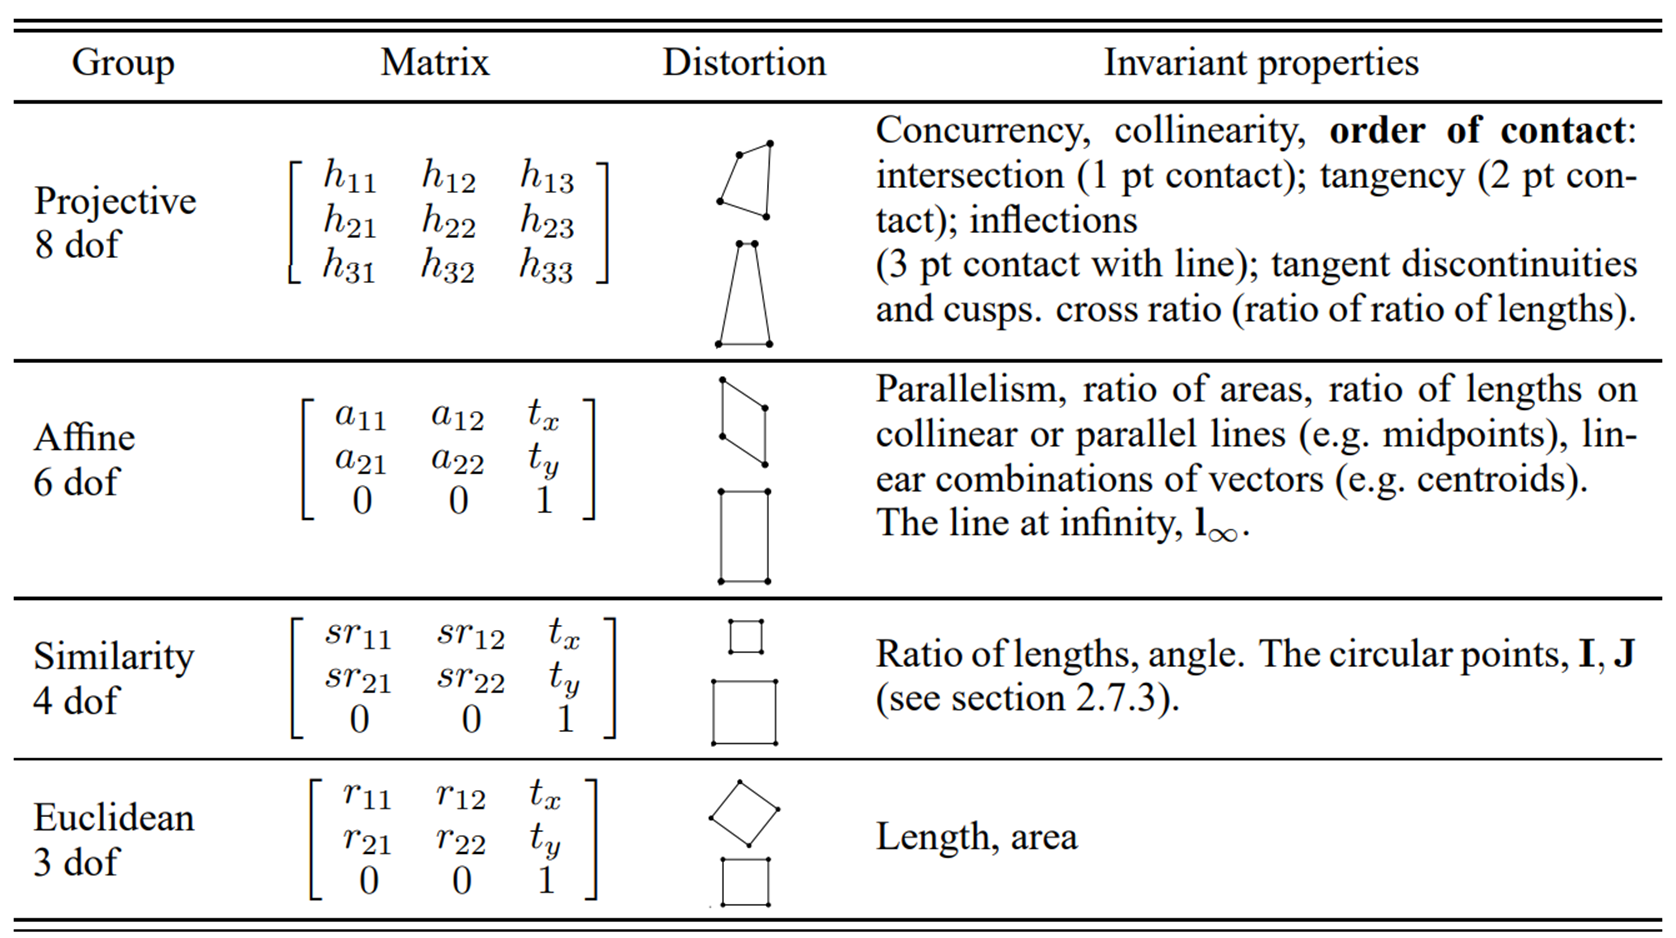
For projective transformation, we say 8 degrees of freedom because the last element of the matrix is normalized to 1.

For an affine transformation the degrees of freedom are:
1. Translation in x direction
2. Translation in y direction
3. Scale factor in x direction
4. Scale factor in y direction
5. Rotation angle
6. Shear factor in x direction

For a similarity transformation the degrees of freedom are:
1. Translation in x direction
2. Translation in y direction
3. Rotation angle
4. Scale factor

For a Euclidean transformation the degrees of freedom are:
1. Translation in x direction
2. Translation in y direction
3. Rotation angle

### Fitting an Affine Transformation

An affine transformation can cause changes in scale, skew and location but preserve parallel lines.

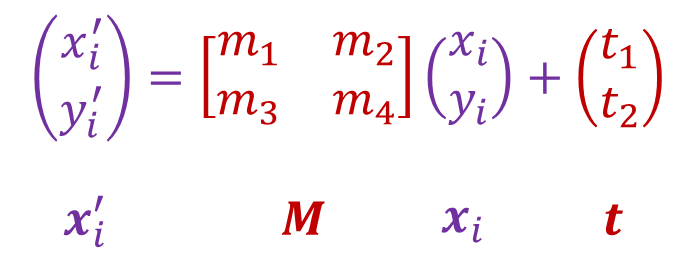

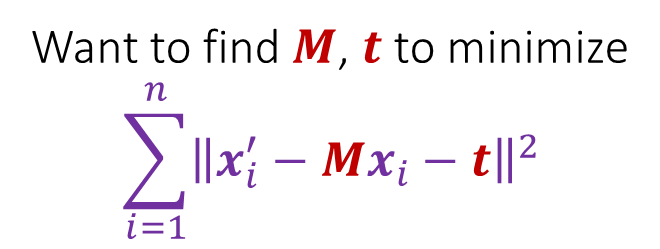

Therefore, this is a simple linear regression problem.

The overall transformation can be represented as:

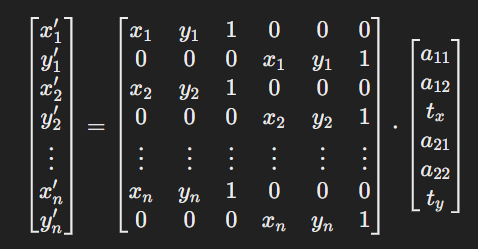

Where the matrix contains each point which we know.

The minimum number of points needed is 3. Each point gives us 2 equations and we have a total of 6 unknowns. Therefore, we need 3 points.

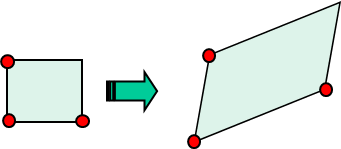

### Homography

A homography is a projective transformation. It is a 3x3 matrix. There a 8 degrees of freedom. A homography can cause a change in scale, skew, location and perspective (loss of parallel lines). An example in real life is the transformation between 2 points of a plane. An application of fitting a homography is panaroma stiching.

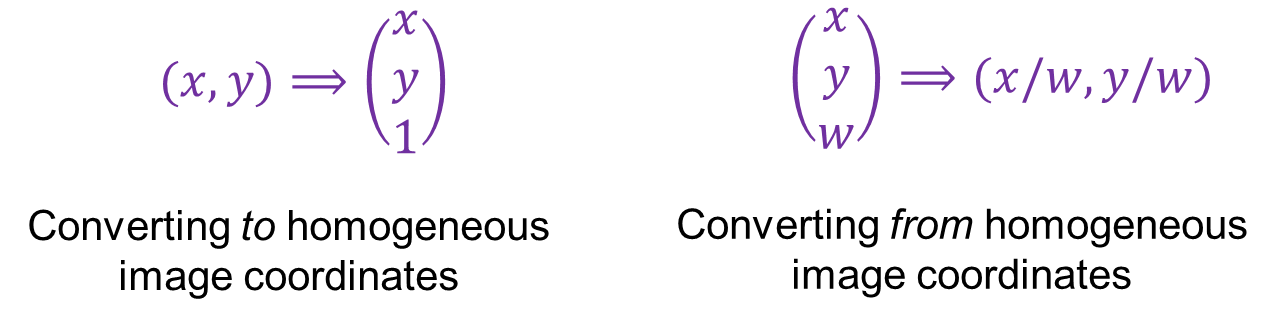

Whatever the value of w, all points are equivalent.

A homography is given by:

$$
\lambda \begin{bmatrix}
x' \\
y' \\
z'
\end{bmatrix} = 
\begin{bmatrix} h_{11}&h_{12}&h_{13} \\ 
h_{21}&h_{22}&h_{23} \\
h_{31}&h_{32}&h_{33} \end{bmatrix}
\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}
$$

Therefore,
$$\lambda x' = Hx$$

which means that $x'$ is a scaled version of $Hx$. Therefore, they are parallel and their cross product is 0. Therefore,

$$x' \times Hx = 0$$

$$\mathbf{x}_i' \times \mathbf{H}\mathbf{x}_i =
\begin{pmatrix}
x_i' \\
y_i' \\
1
\end{pmatrix}
\times
\begin{pmatrix}
\mathbf{h}_1^T \mathbf{x}_i \\
\mathbf{h}_2^T \mathbf{x}_i \\
\mathbf{h}_3^T \mathbf{x}_i
\end{pmatrix}
=
\begin{pmatrix}
y_i' \mathbf{h}_3^T \mathbf{x}_i - \mathbf{h}_2^T \mathbf{x}_i \\
\mathbf{h}_1^T \mathbf{x}_i - x_i' \mathbf{h}_3^T \mathbf{x}_i \\
x_i' \mathbf{h}_2^T \mathbf{x}_i - y_i' \mathbf{h}_1^T \mathbf{x}_i
\end{pmatrix}
$$

By rearranging the terms we obtain:

$$
\begin{bmatrix}
0^T & -x_i^T & y'_ix^T \\
x_i^T & 0^T & -x'_ix_i^T \\
-y'_ix^T & x'_iy^T & 0^T

\end{bmatrix}
\begin{pmatrix}
h_1 \\
h_2 \\
h_3
\end{pmatrix} = 0
$$

Not all these equations are linearly independent. If 2 equations are satisfied, the third is also satisfied.

If we have n points, we can extend the matrix as:

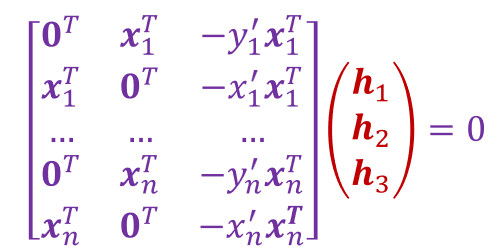

The goal is to make sure the norm of thie above multiplication is as low as possible.
 
There are 8 unknowns and 2 equations per point. Therefore, we need 4 points.

### Robust Feature Based Alignment

So far, we knew the correpondences between a pair of images. What if we didn't know the correspondences? In this case, we can use feature matching. We can use SIFT, SURF, ORB, etc. to find the correspondences. Steps of such a procedure are as follows:

1. Detect features in both images

2. Compute putaive matches (initial matches not verified)

3. Loop: Hypothesize transformation, verify matches, estimate transformation, refine matches

The simplest type of discriptor is a vector of raw intensity values. They can be compared using the sum of squared differences.

$$ SSD = \sum_{i} (I_1(x_i) - I_2(x_i))^2 $$

Another method is normalized cross correlation. It is the dot product of the normalized vectors.

$$ NCC = \frac{\sum_{i} (I_1(x_i) - \bar{I_1})(I_2(x_i) - \bar{I_2})}{\sqrt{\sum_{i} (I_1(x_i) - \bar{I_1})^2 \sum_{i} (I_2(x_i) - \bar{I_2})^2}} $$

Typically NC is preferred over SSD because it is invariant to changes in illumination. Additionally, since it normalizes pixels, it is robust to noise compared to SSD.

### SIFT

SIFT is a feature descriptor. It is invariant to scale, rotation and illumination. It is also robust to noise. One patch is of size 16x16. It is divided into 16 subpatches of size 4x4. SIFT uses interest points. Interest points satisfy the below criteria:

1. Has rich image content (brightness variation, colour variation, etc.)

2. Should have a well defined representation for matching

3. Has a well defined position in the image.

4. Should be invariant to image rotation and scaling.

5. Should be invariant to illumination changes.

Are lines and edges good interest points?

No. There will be many lines and edges which are similar to each other. Edges and lines slide along a boundary and they can be matched to any point along that boundary.

Corners don't show up often are are not unique. They are not invariant to rotation.

The best interest points are blobs. They are invariant to rotation and scaling. They are also invariant to illumination changes.

For a blob to be useful, we neeed to:

* Locate the blob

* Determine the scale of the blob

* Determine the orientation of the blob

* Extract the descriptor that is invariant to rotation and scaling.

How do we detect blobs?

We can use the Laplacian of Gaussian (LoG) operator. The LoG operator is a 2D convolution of the image with the second derivative of a Gaussian function. The LoG operator is a blob detector. The LoG operator is a bandpass filter. It is a high pass filter for small blobs and a low pass filter for large blobs.

Difference of Gaussian is a faster approximation of the LoG operator. It is the difference of 2 Gaussian filters. For the process, check the edges, corners and blobs notebook. We apply a threshold to remove non prominant features.

After dividing up the patches, we get the gradient of each patch. We then get the orientation of the gradient. We then get the histogram of the gradient and the direction of the dominant direction. After getting this direction, we can remove any rotation in the image.

#### SIFT Matching

We need descriptors to match features. Here also we can use the normalized corelation coefficient for the histograms. We can also use the Euclidean distance between the histograms.

After this, we generate putative correspondences. These are tentative matches between feature descriptors from 2 images. They are generated based on similarity but have not been verifed yet. Next, ambigous matches need to be rejected. This is done as follows:

1. For each feature descriptor in the first image, find the two nearest neighbors in the second image.

2. Compute the ratio of the distance of the closest match to the distance of the second closest match. (If ratios aren't close, it means that features aren't that unique)

3. If the ratio is below a certain threshold (typically 0.8), accept the match; otherwise, reject it

Even after filtering out ambigous matches as above, there still will be a high percentage of outliers. These can be removed by robust alignment RANSAC

The procedure is as follows:

1. Randomly select a seed group of matches

2. Compute transformations from seed group

3. Find inliers to this transformation (An inlier is a point lying within a certain tolerance)

4. If the number of inliers is sufficiently large, recompute least squares estimmate of transformation on all of the inliers.

Instead of RANSAC, Hough voting can be used as follows:

1. Use the Hough Transform to vote for the most likely transformation parameters (e.g., translation, rotation, scale).

2. Estimate the transformation parameters based on the votes.

3. Apply Transformation: Align the images using the estimated transformation.